# 括号生成

**题目来源：力扣（LeetCode）**

**链接：https://leetcode-cn.com/problems/generate-parentheses/**

## 一、题目

给出 n 代表生成括号的对数，请你写出一个函数，使其能够生成所有可能的并且有效的括号组合。

## 二、示例

输入：

n = 3

输出：

["((()))",
  
  "(()())",
  
  "(())()",
  
  "()(())",
  
  "()()()"]

## 三、解题思路

### 回溯法

#### 组合括号

n组括号，有多少种组合的可能？

n组括号，括号字符串长度为2n，每个字符型中每个字符又两种选择可能，“(”或“)”，故有$ 2^{2n} $种可能。

例如两组括号，所有的组合可能性为：

['((((', '((()', '(()(', '(())', '()((', '()()', '())(', '()))', ')(((', ')(()', ')()(', ')())', '))((', '))()', ')))(', '))))']

这16种中，那些是合法的，有多少种合法的可能，如何生成它们。

使用递归生成所有组合：

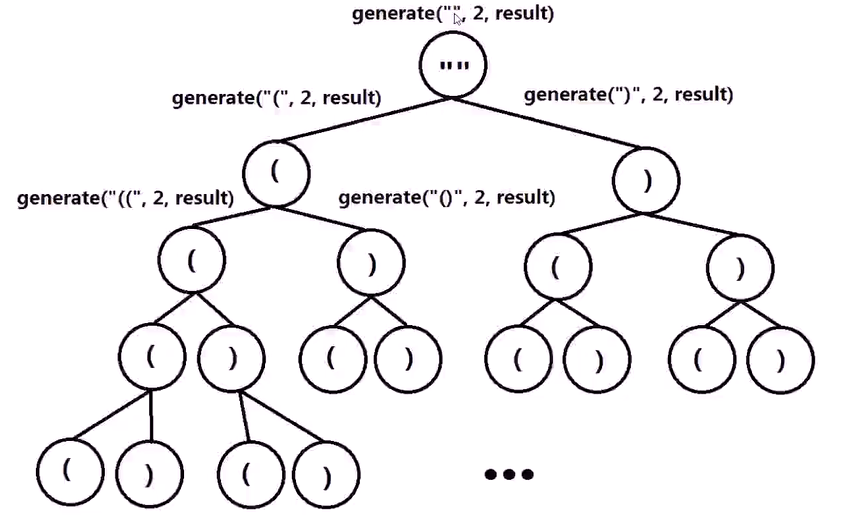

In [3]:
def allset(n):
    def generate(item, n, result):
        if len(item) == 2 * n:
            result.append(item)
            return
        generate(item + "(", n, result)
        generate(item + ")", n, result)
    result = []
    generate("", n, result)
    return result

In [4]:
allset(2)

['((((',
 '((()',
 '(()(',
 '(())',
 '()((',
 '()()',
 '())(',
 '()))',
 ')(((',
 ')(()',
 ')()(',
 ')())',
 '))((',
 '))()',
 ')))(',
 '))))']

#### 括号合法性

在所有的组成可能中，哪些是合法的？

1. 左括号和右括号的数量不能超过n
2. 每放一个左括号才可以放一个右括号，即右括号不可先于左括号放置

故，递归需要增加限制条件

1. 左括号与右括号的数量，最多放置n个
2. 若左括号的数量小于等于右括号的数量，不进行放置右括号的递归